<a href="https://colab.research.google.com/github/mfattibello/ML/blob/master/Desafio1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets #sklearn é uma das lib mais utilizadas em ML, ela contém, além dos 
                            #datasets, várias outras funções úteis para a análise de dados
                            # essa lib será sua amiga durante toda sua carreira
import pandas as pd  # importa a lib Pandas. Essa lib é utilizada para lidar com dataframes (TABELAS) 
                     #de forma mais amigável. 
from sklearn.model_selection import train_test_split,KFold,cross_val_score, cross_val_predict # esse método é utilizado para dividir o 
                                                    # conjunto de dados em grupos de treinamento e test
from sklearn.svm import SVC      #importa o algoritmo svm para ser utilizado 
from sklearn import tree         # importa o algoritmo arvore de decisão
from sklearn.linear_model import LogisticRegression #importa o algoritmo de regressão logística
from sklearn.metrics import mean_absolute_error #utilizada para o calculo do MAE
from sklearn.metrics import mean_squared_error #utilizada para o calculo do MSE
from sklearn.metrics import r2_score #utilizada para o calculo do R2
from sklearn import metrics  #utilizada para as métricas de comparação entre os métodos
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#importando o banco de dados a ser utilizado (comando necessário para o google colab)
from google.colab import files
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod (4).csv


In [0]:
#lendo o dataset no formato de um dataframe através da função read do pandas
nomeArquivo = 'comp_bikes_mod.csv' 
dataset = pd.read_csv(nomeArquivo, sep=',') #realiza a leitura do banco de dados

In [10]:
#print do dataset
dataset.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [11]:
dataset.shape # mostra a dimensão do dataset

(17379, 17)

In [12]:
#conhecendo o dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [0]:
dataset.dropna(subset=['dteday'], inplace=True) #remove as linhas onde a coluna dteday está nula

In [14]:
dataset.info() #checa os novos valores

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [0]:
dataset_drop = dataset.copy()

In [16]:
dataset_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         14070 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      14071 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         14079 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [0]:
# importe OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder() #instancia o objeto

In [0]:

dataset_one_hot = dataset
dataset_one_hot = pd.get_dummies(dataset)


In [19]:
dataset_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Columns: 747 entries, instant to dteday_2012-12-31
dtypes: float64(16), uint8(731)
memory usage: 12.9 MB


In [20]:
dataset_one_hot.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_2011-01-01,dteday_2011-01-02,dteday_2011-01-03,dteday_2011-01-04,dteday_2011-01-05,dteday_2011-01-06,dteday_2011-01-07,dteday_2011-01-08,dteday_2011-01-09,dteday_2011-01-10,dteday_2011-01-11,dteday_2011-01-12,dteday_2011-01-13,dteday_2011-01-14,dteday_2011-01-15,dteday_2011-01-16,dteday_2011-01-17,dteday_2011-01-18,dteday_2011-01-19,dteday_2011-01-20,dteday_2011-01-21,dteday_2011-01-22,dteday_2011-01-23,dteday_2011-01-24,...,dteday_2012-11-22,dteday_2012-11-23,dteday_2012-11-24,dteday_2012-11-25,dteday_2012-11-26,dteday_2012-11-27,dteday_2012-11-28,dteday_2012-11-29,dteday_2012-11-30,dteday_2012-12-01,dteday_2012-12-02,dteday_2012-12-03,dteday_2012-12-04,dteday_2012-12-05,dteday_2012-12-06,dteday_2012-12-07,dteday_2012-12-08,dteday_2012-12-09,dteday_2012-12-10,dteday_2012-12-11,dteday_2012-12-12,dteday_2012-12-13,dteday_2012-12-14,dteday_2012-12-15,dteday_2012-12-16,dteday_2012-12-17,dteday_2012-12-18,dteday_2012-12-19,dteday_2012-12-20,dteday_2012-12-21,dteday_2012-12-22,dteday_2012-12-23,dteday_2012-12-24,dteday_2012-12-25,dteday_2012-12-26,dteday_2012-12-27,dteday_2012-12-28,dteday_2012-12-29,dteday_2012-12-30,dteday_2012-12-31
1,2.0,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5.0,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,6.0,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
dataset.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [22]:
dataset_one_hot.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_2011-01-01,dteday_2011-01-02,dteday_2011-01-03,dteday_2011-01-04,dteday_2011-01-05,dteday_2011-01-06,dteday_2011-01-07,dteday_2011-01-08,dteday_2011-01-09,dteday_2011-01-10,dteday_2011-01-11,dteday_2011-01-12,dteday_2011-01-13,dteday_2011-01-14,dteday_2011-01-15,dteday_2011-01-16,dteday_2011-01-17,dteday_2011-01-18,dteday_2011-01-19,dteday_2011-01-20,dteday_2011-01-21,dteday_2011-01-22,dteday_2011-01-23,dteday_2011-01-24,...,dteday_2012-11-22,dteday_2012-11-23,dteday_2012-11-24,dteday_2012-11-25,dteday_2012-11-26,dteday_2012-11-27,dteday_2012-11-28,dteday_2012-11-29,dteday_2012-11-30,dteday_2012-12-01,dteday_2012-12-02,dteday_2012-12-03,dteday_2012-12-04,dteday_2012-12-05,dteday_2012-12-06,dteday_2012-12-07,dteday_2012-12-08,dteday_2012-12-09,dteday_2012-12-10,dteday_2012-12-11,dteday_2012-12-12,dteday_2012-12-13,dteday_2012-12-14,dteday_2012-12-15,dteday_2012-12-16,dteday_2012-12-17,dteday_2012-12-18,dteday_2012-12-19,dteday_2012-12-20,dteday_2012-12-21,dteday_2012-12-22,dteday_2012-12-23,dteday_2012-12-24,dteday_2012-12-25,dteday_2012-12-26,dteday_2012-12-27,dteday_2012-12-28,dteday_2012-12-29,dteday_2012-12-30,dteday_2012-12-31
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.00000,15641.000000,15641.000000,15641.00000,15641.000000,15641.000000,15641.000000,15641.00000,15641.00000,15641.000000,15641.000000,15641.000000,...,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.00000,15641.00000,15641.000000,15641.00000,15641.00000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.00000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.00000,15641.00000,15641.00000,15641.000000,15641.00000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.00000,15641.000000,15641.000000,15641.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850,0.001407,0.001279,0.001407,0.001343,0.001279,0.001407,0.001279,0.001279,0.001343,0.001407,0.001407,0.001215,0.00147,0.001279,0.001407,0.00147,0.001407,0.000575,0.001343,0.00147,0.00147,0.001343,0.001279,0.001279,...,0.001343,0.001407,0.001407,0.001407,0.001407,0.001407,0.001534,0.00147,0.00147,0.001343,0.00147,0.00147,0.001534,0.001407,0.001343,0.001407,0.001279,0.001279,0.001343,0.00147,0.001151,0.001343,0.001087,0.001343,0.001343,0.00147,0.00147,0.00147,0.001534,0.00147,0.001343,0.001215,0.001215,0.001407,0.001407,0.001407,0.00147,0.001279,0.001343,0.001407
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589,0.037479,0.035737,0.037479,0.036618,0.035737,0.037479,0.035737,0.035737,0.036618,0.037479,0.037479,0.034833,0.03832,0.035737,0.037479,0.03832,0.037479,0.023982,0.036618,0.03832,0.03832,0.036618,0.035737,0.035737,...,0.036618,0.037479,0.037479,0.037479,0.037479,0.037479,0.039143,0.03832,0.03832,0.036618,0.03832,0.03832,0.039143,0.037479,0.036618,0.037479,0.035737,0.035737,0.036618,0.03832,0.033905,0.036618,0.032951,0.036618,0.036618,0.03832,0.03832,0.03832,0.039143,0.03832,0.036618,0.034833,0.034833,0.037479,0.037479,0.037479,0.03832,0.035737,0.036618,0.037479
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0

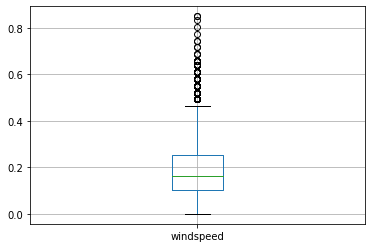

In [23]:
#realizando o boxplot 
dataset_one_hot.boxplot(['windspeed'])

In [24]:
dataset_one_hot.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,dteday_2011-01-01,dteday_2011-01-02,dteday_2011-01-03,dteday_2011-01-04,dteday_2011-01-05,dteday_2011-01-06,dteday_2011-01-07,dteday_2011-01-08,dteday_2011-01-09,dteday_2011-01-10,dteday_2011-01-11,dteday_2011-01-12,dteday_2011-01-13,dteday_2011-01-14,dteday_2011-01-15,dteday_2011-01-16,dteday_2011-01-17,dteday_2011-01-18,dteday_2011-01-19,dteday_2011-01-20,dteday_2011-01-21,dteday_2011-01-22,dteday_2011-01-23,dteday_2011-01-24,...,dteday_2012-11-22,dteday_2012-11-23,dteday_2012-11-24,dteday_2012-11-25,dteday_2012-11-26,dteday_2012-11-27,dteday_2012-11-28,dteday_2012-11-29,dteday_2012-11-30,dteday_2012-12-01,dteday_2012-12-02,dteday_2012-12-03,dteday_2012-12-04,dteday_2012-12-05,dteday_2012-12-06,dteday_2012-12-07,dteday_2012-12-08,dteday_2012-12-09,dteday_2012-12-10,dteday_2012-12-11,dteday_2012-12-12,dteday_2012-12-13,dteday_2012-12-14,dteday_2012-12-15,dteday_2012-12-16,dteday_2012-12-17,dteday_2012-12-18,dteday_2012-12-19,dteday_2012-12-20,dteday_2012-12-21,dteday_2012-12-22,dteday_2012-12-23,dteday_2012-12-24,dteday_2012-12-25,dteday_2012-12-26,dteday_2012-12-27,dteday_2012-12-28,dteday_2012-12-29,dteday_2012-12-30,dteday_2012-12-31
instant,1.000000,0.407970,0.866207,0.488959,-0.008643,0.014597,-0.001126,-0.010626,-0.020270,0.141681,0.141808,0.007919,-0.072738,0.167456,0.288272,0.282132,-0.065218,-0.059973,-0.064866,-0.056014,-0.057708,-0.059326,-0.064185,-0.060725,-0.065412,-0.062036,-0.066576,-0.058360,-0.066221,-0.058042,-0.057879,-0.062601,-0.062421,-0.041766,-0.062149,-0.063512,-0.060221,-0.055103,-0.056640,-0.058126,...,0.055356,0.059975,0.058710,0.061771,0.059075,0.057766,0.062338,0.061087,0.061264,0.058453,0.061629,0.060330,0.064900,0.059151,0.059332,0.057908,0.059679,0.058259,0.061591,0.063297,0.045936,0.062133,0.050236,0.062493,0.062678,0.064413,0.063041,0.066309,0.060150,0.061978,0.063765,0.058955,0.055514,0.062663,0.061153,0.066255,0.064825,0.059917,0.063536,0.063703
season,0.407970,1.000000,-0.005610,0.830177,-0.004903,-0.006846,0.005788,0.011555,-0.013153,0.311273,0.319559,0.146984,-0.149802,0.123779,0.173305,0.179190,-0.053747,-0.048609,-0.052509,-0.048609,-0.049943,-0.051242,-0.048609,-0.047238,-0.051242,-0.048609,-0.049943,-0.047238,-0.053747,-0.049943,-0.052509,-0.051242,-0.048609,-0.030301,-0.051242,-0.053747,-0.052509,-0.051242,-0.048609,-0.049943,...,0.051957,0.051957,0.048098,0.050703,0.050703,0.053182,0.051957,0.051957,0.049417,0.045344,0.050703,0.054379,0.054379,0.050703,0.050703,0.048098,0.048098,0.048098,0.050703,0.048098,0.045344,0.046741,0.046741,0.049417,0.049417,0.054379,0.049417,0.051957,0.053182,-0.052509,-0.049943,-0.045826,-0.045826,-0.051242,-0.051242,-0.048609,-0.054957,-0.049943,-0.051242,-0.049943
yr,0.866207,-0.005610,1.000000,-0.010337,-0.006261,0.007763,-0.008526,-0.000958,-0.026142,0.040857,0.037290,-0.082335,-0.010422,0.141733,0.258888,0.252729,-0.039689,-0.035895,-0.036880,-0.038775,-0.033840,-0.039689,-0.034882,-0.037839,-0.035895,-0.034882,-0.035895,-0.033840,-0.038775,-0.035895,-0.037839,-0.035895,-0.037839,-0.023921,-0.033840,-0.039689,-0.038775,-0.035895,-0.035895,-0.035895,...,0.034665,0.035671,0.034665,0.036650,0.037603,0.038533,0.038533,0.039442,0.039442,0.037603,0.037603,0.037603,0.039442,0.038533,0.036650,0.038533,0.036650,0.037603,0.037603,0.039442,0.032560,0.036650,0.033629,0.035671,0.037603,0.036650,0.035671,0.039442,0.039442,0.040329,0.035671,0.035671,0.034665,0.036650,0.033629,0.036650,0.039442,0.034665,0.035671,0.036650
mnth,0.488959,0.830177,-0.010337,1.000000,-0.005681,0.021196,0.018991,-0.004235,0.002774,0.202203,0.210337,0.158109,-0.126643,0.074406,0.127226,0.129162,-0.059206,-0.052599,-0.059206,-0.062249,-0.059206,-0.057625,-0.060747,-0.059206,-0.060747,-0.056000,-0.062249,-0.057625,-0.059206,-0.059206,-0.057625,-0.060747,-0.060747,-0.033256,-0.057625,-0.062249,-0.060747,-0.060747,-0.056000,-0.057625,...,0.047610,0.047610,0.047610,0.047610,0.050057

In [25]:
dataset_one_hot[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr()

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.988102,-0.069887,-0.016022,0.405867
atemp,0.988102,1.000000,-0.054224,-0.058803,0.403810
hum,-0.069887,-0.054224,1.000000,-0.289859,-0.323409
windspeed,-0.016022,-0.058803,-0.289859,1.000000,0.091747
cnt,0.405867,0.403810,-0.323409,0.091747,1.000000


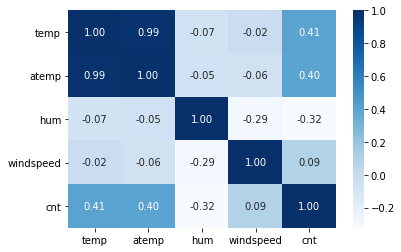

In [26]:
sns.heatmap(dataset_one_hot[['temp', 'atemp', 'hum', 'windspeed','cnt']].corr(), annot = True,
            fmt = '.2f',
            cmap='Blues')
plt.show()

In [0]:
#dataset_drop['dteday'] = pd.to_datetime(dataset_drop['dteday'].str.strip())

In [57]:
dataset_drop.dteday.max()

'2012-12-31'

In [0]:
dataset["hum"].fillna(dataset["hum"].mean(), inplace=True)
dataset["casual"].fillna(dataset["casual"].mean(), inplace=True)
dataset["cnt"].fillna(dataset["cnt"].mean(), inplace=True)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     14060 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      14061 non-null  float64
 3   yr          14076 non-null  float64
 4   mnth        14062 non-null  float64
 5   hr          14068 non-null  float64
 6   holiday     14076 non-null  float64
 7   weekday     14078 non-null  float64
 8   workingday  14097 non-null  float64
 9   weathersit  14078 non-null  float64
 10  temp        14066 non-null  float64
 11  atemp       14076 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   14082 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  14090 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.1+ MB


In [0]:
#Preparando os Dados
xData = dataset[['hum','casual']].values
yData = dataset[['cnt']].values

In [0]:
#Realiza a construção do modelo de regressão
reg= LinearRegression()
regressao= reg.fit (xData, yData) # encontra os coeficientes (realiza a regressão)

In [0]:
#realiza a previsão
previsao=reg.predict(xData)

In [34]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(yData, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Y = [[-99.75012328   2.21512197]]X [173.29337505]
Coeficiente de Determinação (R2): 0.4059859251122173


In [0]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
del dataset['dteday']
scaled_df = scaler.fit_transform(dataset)

In [0]:
from sklearn.tree import DecisionTreeRegressor  #importando a árvore de decisão como regressor

In [0]:
entrada_arvore=xData #entrada para a regressão via árvore
saida_arvore=yData.reshape(-1,1) #saída para a regressão via árvore

In [0]:
x_train, x_test, y_train, y_test = train_test_split(entrada_arvore, saida_arvore, test_size=0.30, random_state=42) #divisão entre treinamento e teste

In [54]:
arvore_regressora=DecisionTreeRegressor() #define o objeto para a árvore de decisão como regressora
arvore_regressora.fit(entrada_arvore, saida_arvore) #aplica a regressão

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
#realiza a previsão
previsao_arvore=arvore_regressora.predict(entrada_arvore)

In [56]:
from sklearn import metrics
print('Erro absoluto:', metrics.mean_absolute_error(saida_arvore, previsao_arvore))
print('Mean Squared Error:', metrics.mean_squared_error(saida_arvore, previsao_arvore))
print('R2: ', metrics.r2_score(saida_arvore, previsao_arvore))

Erro absoluto: 58.54911405435064
Mean Squared Error: 8577.336772824097
R2:  0.7098339715834964
